In [47]:
import numpy as np

import pandas as pd
import seaborn as sns
sns.set_style("whitegrid")
pd.set_option('display.max_columns', 8)
pd.set_option('display.width', 10000)

In [7]:
df = pd.read_csv(r"C:\Users\Komal\dataset\HousingData.csv")

In [8]:
df.head()

,CRIM,ZN,INDUS,CHAS,...,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,...,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,...,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,...,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,...,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,...,18.7,396.90,NaN,36.2


In [9]:
df.dtypes


CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX          int64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [10]:
df.count()

CRIM       486
ZN         486
INDUS      486
CHAS       486
NOX        506
RM         506
AGE        486
DIS        506
RAD        506
TAX        506
PTRATIO    506
B          506
LSTAT      486
MEDV       506
dtype: int64

In [11]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [12]:
(df.isnull()).sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [13]:
(df==0).sum()

CRIM         0
ZN         360
INDUS        0
CHAS       452
NOX          0
RM           0
AGE          0
DIS          0
RAD          0
TAX          0
PTRATIO      0
B            0
LSTAT        0
MEDV         0
dtype: int64

In [14]:
print(df["ZN"],df["CHAS"])

0      18.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
501     0.0
502     0.0
503     0.0
504     0.0
505     0.0
Name: ZN, Length: 506, dtype: float64 0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
501    0.0
502    0.0
503    0.0
504    0.0
505    0.0
Name: CHAS, Length: 506, dtype: float64


In [15]:
df= df.dropna()
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [16]:
df.RAD.unique()

array([ 1,  2,  3,  5,  4,  8,  6,  7, 24], dtype=int64)

<Axes: ylabel='count'>

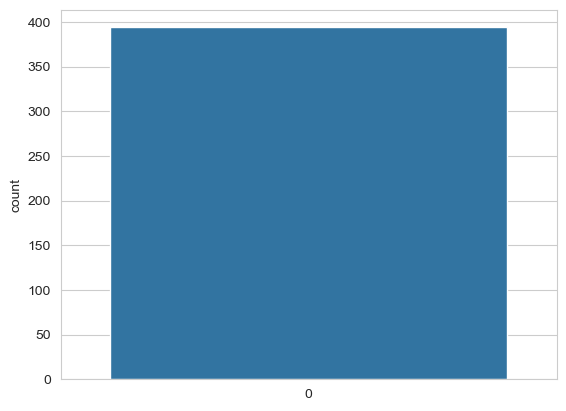

In [17]:
sns.countplot(df.RAD)

In [18]:
bins=(0,4,25)
group_names=["bad_railway_acess" , "good_railway_acess"]
df["Railway_Index"]=pd.cut(df.RAD , bins=bins,labels=group_names)
df["Railway_Index"]


0       bad_railway_acess
1       bad_railway_acess
2       bad_railway_acess
3       bad_railway_acess
5       bad_railway_acess
              ...        
499    good_railway_acess
500    good_railway_acess
502     bad_railway_acess
503     bad_railway_acess
504     bad_railway_acess
Name: Railway_Index, Length: 394, dtype: category
Categories (2, object): ['bad_railway_acess' < 'good_railway_acess']

In [19]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [20]:
label_quality=LabelEncoder()
df["Railway_Index"]=label_quality.fit_transform(df["Railway_Index"])
df.head(10)

,CRIM,ZN,INDUS,CHAS,...,B,LSTAT,MEDV,Railway_Index
0,0.00632,18.0,2.31,0.0,...,396.90,4.98,24.0,0
1,0.02731,0.0,7.07,0.0,...,396.90,9.14,21.6,0
2,0.02729,0.0,7.07,0.0,...,392.83,4.03,34.7,0
3,0.03237,0.0,2.18,0.0,...,394.63,2.94,33.4,0
5,0.02985,0.0,2.18,0.0,...,394.12,5.21,28.7,0
7,0.14455,12.5,7.87,0.0,...,396.90,19.15,27.1,1
8,0.21124,12.5,7.87,0.0,...,386.63,29.93,16.5,1
10,0.22489,12.5,7.87,0.0,...,392.52,20.45,15.0,1
11,0.11747,12.5,7.87,0.0,...,396.90,13.27,18.9,1
12,0.09378,12.5,7.87,0.0,...,390.50,15.71,21.7,1


<Axes: ylabel='count'>

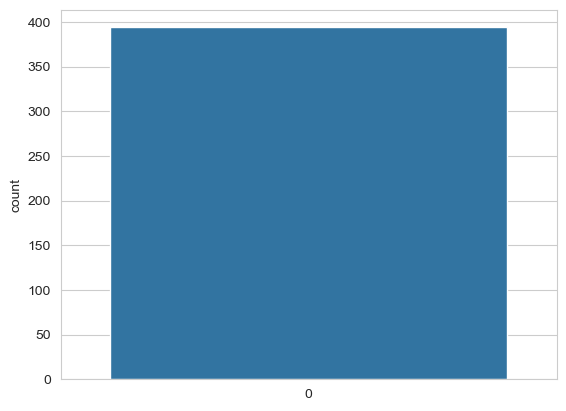

In [27]:
sns.countplot(df["Railway_Index"])

In [22]:
df.astype('int32').dtypes
df.head()

,CRIM,ZN,INDUS,CHAS,...,B,LSTAT,MEDV,Railway_Index
0,0.00632,18.0,2.31,0.0,...,396.90,4.98,24.0,0
1,0.02731,0.0,7.07,0.0,...,396.90,9.14,21.6,0
2,0.02729,0.0,7.07,0.0,...,392.83,4.03,34.7,0
3,0.03237,0.0,2.18,0.0,...,394.63,2.94,33.4,0
5,0.02985,0.0,2.18,0.0,...,394.12,5.21,28.7,0


In [23]:
X=df.drop("Railway_Index",axis=1)
y=df['Railway_Index']

In [24]:
from sklearn.ensemble import  RandomForestClassifier
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train , y_test= train_test_split(X,y,test_size=0.25,random_state=42)

In [28]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [29]:
X_train[:1]

array([[-0.28866954, -0.48242385, -0.44682748, -0.26967994, -0.16413593,
        -0.97977891,  1.00392518,  0.0052108 , -0.662693  , -0.61046168,
         1.12203354,  0.23445275,  1.04275104, -0.92374535]])

In [30]:
rfc=RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)
pred_rfc=rfc.predict(X_test)
pred_rfc[:2]

array([0, 0])

In [31]:
from sklearn.metrics import accuracy_score
cm=accuracy_score(y_test,pred_rfc)
cm

1.0